In [1]:
import pandas as pd

# Path to the Excel file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Data file (1877-1922 transcribed data) (1).xlsx'

# Read the Excel file with the specific sheet
df = pd.read_excel(file_path)
# Now you can work with the dataframe 'df' which contains the data from the specified sheet

print(df)

                      Date  Day  Month  Year  Attached.Thermometer..C.  \
0               1877-01-01    1      1  1877                     -99.9   
1               1877-01-02    2      1  1877                     -99.9   
2               1877-01-03    3      1  1877                     -99.9   
3               1877-01-04    4      1  1877                     -99.9   
4               1877-01-05    5      1  1877                     -99.9   
...                    ...  ...    ...   ...                       ...   
16611  1922-06-26 00:00:00   26      6  1922                      11.7   
16612  1922-06-27 00:00:00   27      6  1922                      11.7   
16613  1922-06-28 00:00:00   28      6  1922                      10.0   
16614  1922-06-29 00:00:00   29      6  1922                       7.2   
16615  1922-06-30 00:00:00   30      6  1922                       7.2   

       Sea.Level.Pressure..hPa.  Dry.Bulb.Temp..C.  Wet.Bulb.Temp..C.  \
0                        -99.90       

In [2]:
# Filter out rows with missing values (-99.9) in the 'Maximum.Temp..C.' column
filtered_df = df[df['Maximum.Temp..C.'] != -99.9]

print(filtered_df[['Year', 'Month', 'Day', 'Maximum.Temp..C.']])  

       Year  Month  Day  Maximum.Temp..C.
181    1877      7    1              11.5
182    1877      7    2              13.3
183    1877      7    3              12.4
193    1877      7   13               9.4
194    1877      7   14               7.4
...     ...    ...  ...               ...
16611  1922      6   26              17.8
16612  1922      6   27              13.3
16613  1922      6   28              12.2
16614  1922      6   29               3.3
16615  1922      6   30               6.7

[16187 rows x 4 columns]


In [3]:
import pandas as pd


# Define temperature categories
very_hot_threshold = 40
hot_threshold = 35
cold_threshold = 15
very_cold_threshold = 10

# Count the occurrences of each temperature category for each year
very_hot_days_count = filtered_df[filtered_df['Maximum.Temp..C.'] > very_hot_threshold].groupby('Year').size()
hot_days_count = filtered_df[(filtered_df['Maximum.Temp..C.'] > hot_threshold) & (filtered_df['Maximum.Temp..C.'] <= very_hot_threshold)].groupby('Year').size()
cold_days_count = filtered_df[(filtered_df['Maximum.Temp..C.'] < cold_threshold) & (filtered_df['Maximum.Temp..C.'] >= very_cold_threshold)].groupby('Year').size()
very_cold_days_count = filtered_df[filtered_df['Maximum.Temp..C.'] < very_cold_threshold].groupby('Year').size()

# Display the counts for each temperature category
print("Annual count of days with maximum temperature > 40°C (Very hot days):")
print(very_hot_days_count)

print("\nAnnual count of days with maximum temperature > 35°C and <= 40°C (Hot days):")
print(hot_days_count)

print("\nAnnual count of days with maximum temperature < 15°C and >= 10°C (Cold days):")
print(cold_days_count)

print("\nAnnual count of days with maximum temperature < 10°C (Very cold days):")
print(very_cold_days_count)


Annual count of days with maximum temperature > 40°C (Very hot days):
Year
1909    1
dtype: int64

Annual count of days with maximum temperature > 35°C and <= 40°C (Hot days):
Year
1878    11
1883     1
1884     9
1885     1
1888     7
1889    12
1890     1
1897     5
1898     6
1899    15
1900     9
1901     8
1902     4
1903     9
1904     2
1905     7
1906     1
1908     1
1909     3
1912     1
1913     1
1915     2
dtype: int64

Annual count of days with maximum temperature < 15°C and >= 10°C (Cold days):
Year
1877    40
1878    53
1879    79
1880    67
1881    79
1882    67
1883    78
1884    71
1885    53
1886    84
1887    80
1888    79
1889    49
1890    65
1891    77
1892    99
1893    81
1894    98
1895    64
1896    57
1897    88
1898    78
1899    72
1900    77
1901    56
1902    63
1903    82
1904    78
1905    78
1906    49
1907    72
1908    77
1909    76
1910    49
1911    67
1912    74
1913    91
1914    67
1915    74
1916    78
1917    82
1918    82
1919    62
1920   

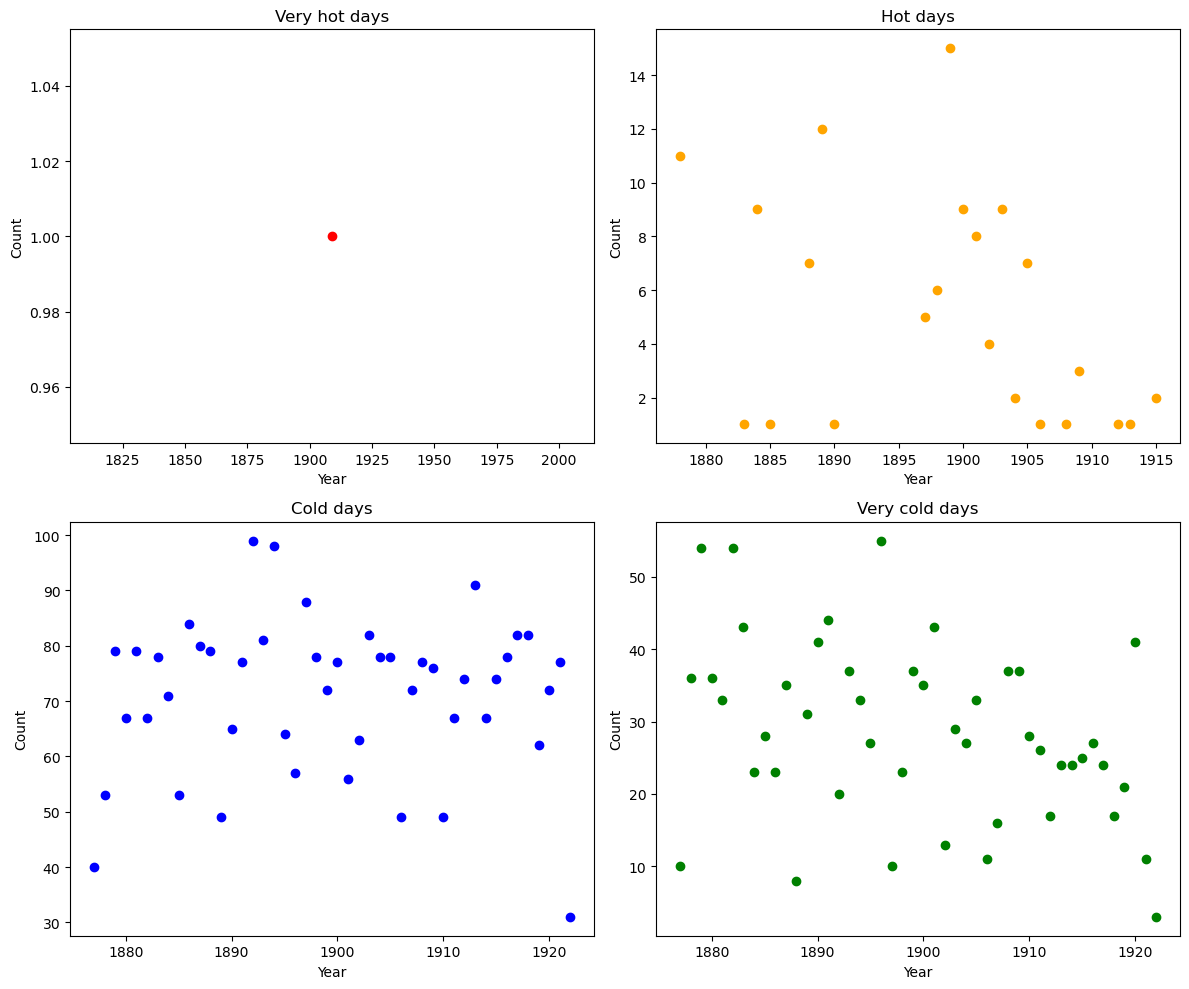

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter out rows with missing values in the 'Maximum.Temp..C.' column
filtered_df = df[df['Maximum.Temp..C.'] != -99.9]

# Define temperature categories
very_hot_threshold = 40
hot_threshold = 35
cold_threshold = 15
very_cold_threshold = 10

# Count the occurrences of each temperature category for each year
very_hot_days_count = filtered_df[filtered_df['Maximum.Temp..C.'] > very_hot_threshold].groupby('Year').size()
hot_days_count = filtered_df[(filtered_df['Maximum.Temp..C.'] > hot_threshold) & (filtered_df['Maximum.Temp..C.'] <= very_hot_threshold)].groupby('Year').size()
cold_days_count = filtered_df[(filtered_df['Maximum.Temp..C.'] < cold_threshold) & (filtered_df['Maximum.Temp..C.'] >= very_cold_threshold)].groupby('Year').size()
very_cold_days_count = filtered_df[filtered_df['Maximum.Temp..C.'] < very_cold_threshold].groupby('Year').size()

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Very hot days scatter plot
axs[0, 0].scatter(very_hot_days_count.index, very_hot_days_count.values, color='red')
axs[0, 0].set_title('Very hot days')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Count')

# Hot days scatter plot
axs[0, 1].scatter(hot_days_count.index, hot_days_count.values, color='orange')
axs[0, 1].set_title('Hot days')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Count')

# Cold days scatter plot
axs[1, 0].scatter(cold_days_count.index, cold_days_count.values, color='blue')
axs[1, 0].set_title('Cold days')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Count')

# Very cold days scatter plot
axs[1, 1].scatter(very_cold_days_count.index, very_cold_days_count.values, color='green')
axs[1, 1].set_title('Very cold days')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
import numpy as np
from scipy.stats import linregress

# Function to calculate slope and intercept of the regression line
def calculate_trend(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept

# Calculate trend for very hot days
slope_very_hot, intercept_very_hot = calculate_trend(very_hot_days_count.index, very_hot_days_count.values)

# Calculate trend for hot days
slope_hot, intercept_hot = calculate_trend(hot_days_count.index, hot_days_count.values)

# Calculate trend for cold days
slope_cold, intercept_cold = calculate_trend(cold_days_count.index, cold_days_count.values)

# Calculate trend for very cold days
slope_very_cold, intercept_very_cold = calculate_trend(very_cold_days_count.index, very_cold_days_count.values)

# Print the trends
print("Trend for Very hot days:", slope_very_hot)
print("Trend for Hot days:", slope_hot)
print("Trend for Cold days:", slope_cold)
print("Trend for Very cold days:", slope_very_cold)

Trend for Very hot days: nan
Trend for Hot days: -0.14409632065855024
Trend for Cold days: 0.02010484119642306
Trend for Very cold days: -0.3395621338267036


C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\manda\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


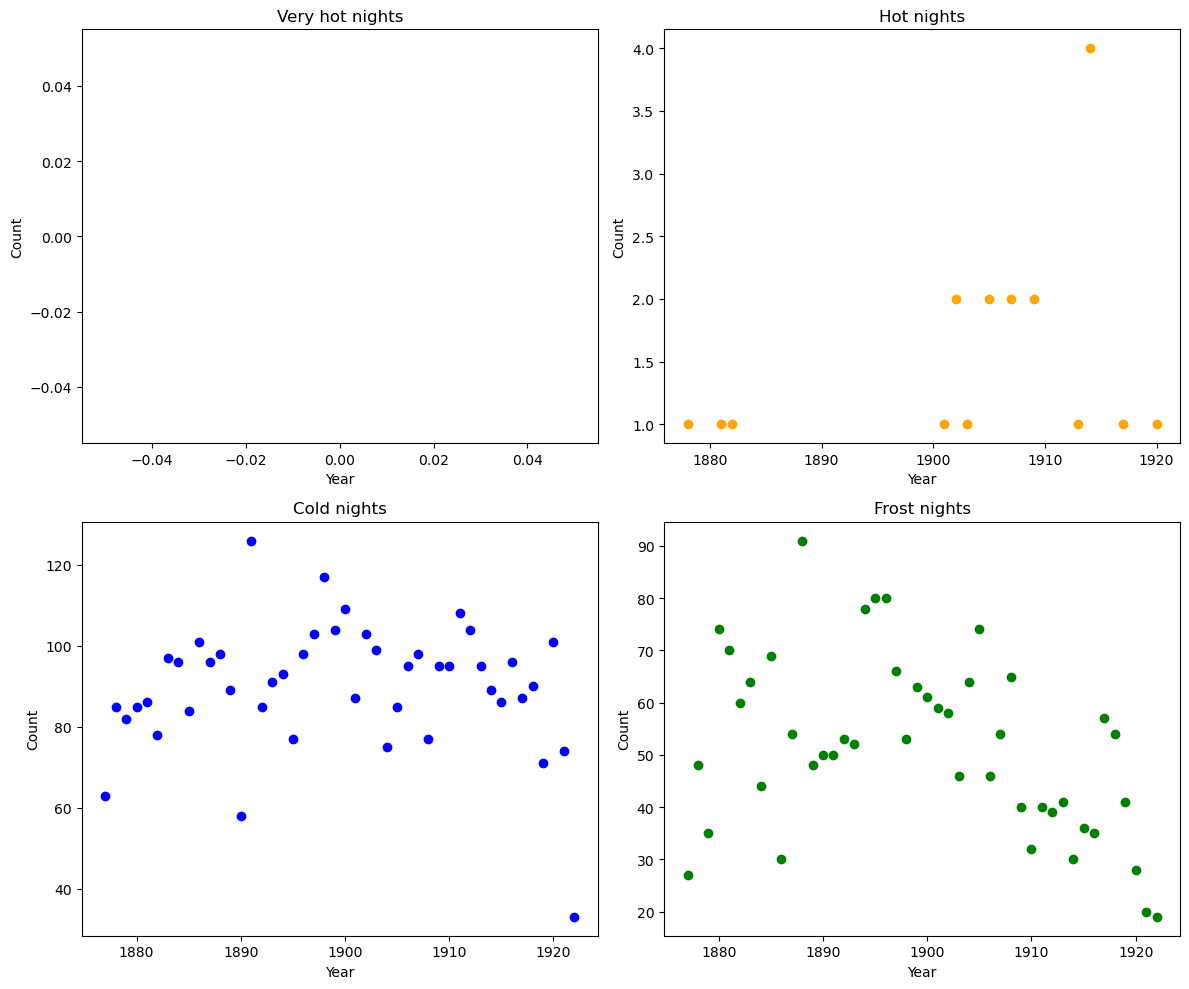

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter out rows with missing values in the 'Minimum.Temp..C.' column
filtered_df = df[df['Minimum.Temp..C.'] != -99.9]

# Define temperature categories
very_hot_nights_threshold = 25
hot_nights_threshold = 20
cold_nights_threshold = 5
frost_nights_threshold = 0

# Count the occurrences of each temperature category for each year
very_hot_nights_count = filtered_df[filtered_df['Minimum.Temp..C.'] > very_hot_nights_threshold].groupby('Year').size()
hot_nights_count = filtered_df[(filtered_df['Minimum.Temp..C.'] > hot_nights_threshold) & (filtered_df['Minimum.Temp..C.'] <= very_hot_nights_threshold)].groupby('Year').size()
cold_nights_count = filtered_df[(filtered_df['Minimum.Temp..C.'] < cold_nights_threshold) & (filtered_df['Minimum.Temp..C.'] >= frost_nights_threshold)].groupby('Year').size()
frost_nights_count = filtered_df[filtered_df['Minimum.Temp..C.'] < frost_nights_threshold].groupby('Year').size()

# Creating subplots for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Very hot nights scatter plot
axs[0, 0].scatter(very_hot_nights_count.index, very_hot_nights_count.values, color='red')
axs[0, 0].set_title('Very hot nights')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Count')

# Hot nights scatter plot
axs[0, 1].scatter(hot_nights_count.index, hot_nights_count.values, color='orange')
axs[0, 1].set_title('Hot nights')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Count')

# Cold nights scatter plot
axs[1, 0].scatter(cold_nights_count.index, cold_nights_count.values, color='blue')
axs[1, 0].set_title('Cold nights')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Count')

# Frost nights scatter plot
axs[1, 1].scatter(frost_nights_count.index, frost_nights_count.values, color='green')
axs[1, 1].set_title('Frost nights')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
import pandas as pd

# Load the saved data
filtered_df2 = pd.read_csv('Rainfall values without -99.9 values.csv')

# Define the criteria for each index
indices_criteria = {
    'Wet days': 1,
    'Heavy precipitation days': 10,
    'Very heavy precipitation days': 30
}

# Initialize a dictionary to store counts for each index
index_counts = {index: [] for index in indices_criteria}

# Calculate counts for each index for each year
for year in filtered_df2['Year']:
    year_data = filtered_df2[filtered_df2['Year'] == year]
    for index, criterion in indices_criteria.items():
        count = (year_data['Rainfall..mm.'] >= criterion).sum()
        index_counts[index].append(count)

# Print counts for each index for each year
for index, counts in index_counts.items():
    print(f"Count of {index}:")
    print(pd.DataFrame({'Year': filtered_df2['Year'], 'Count': counts}))
    print()


Count of Wet days:
       Year  Count
0      1877     36
1      1877     36
2      1877     36
3      1877     36
4      1877     36
...     ...    ...
16358  1914     86
16359  1919     64
16360  1903     81
16361  1895     74
16362  1893    103

[16363 rows x 2 columns]

Count of Heavy precipitation days:
       Year  Count
0      1877     10
1      1877     10
2      1877     10
3      1877     10
4      1877     10
...     ...    ...
16358  1914     26
16359  1919     16
16360  1903     36
16361  1895     26
16362  1893     32

[16363 rows x 2 columns]

Count of Very heavy precipitation days:
       Year  Count
0      1877      1
1      1877      1
2      1877      1
3      1877      1
4      1877      1
...     ...    ...
16358  1914      6
16359  1919      3
16360  1903      5
16361  1895      5
16362  1893      8

[16363 rows x 2 columns]



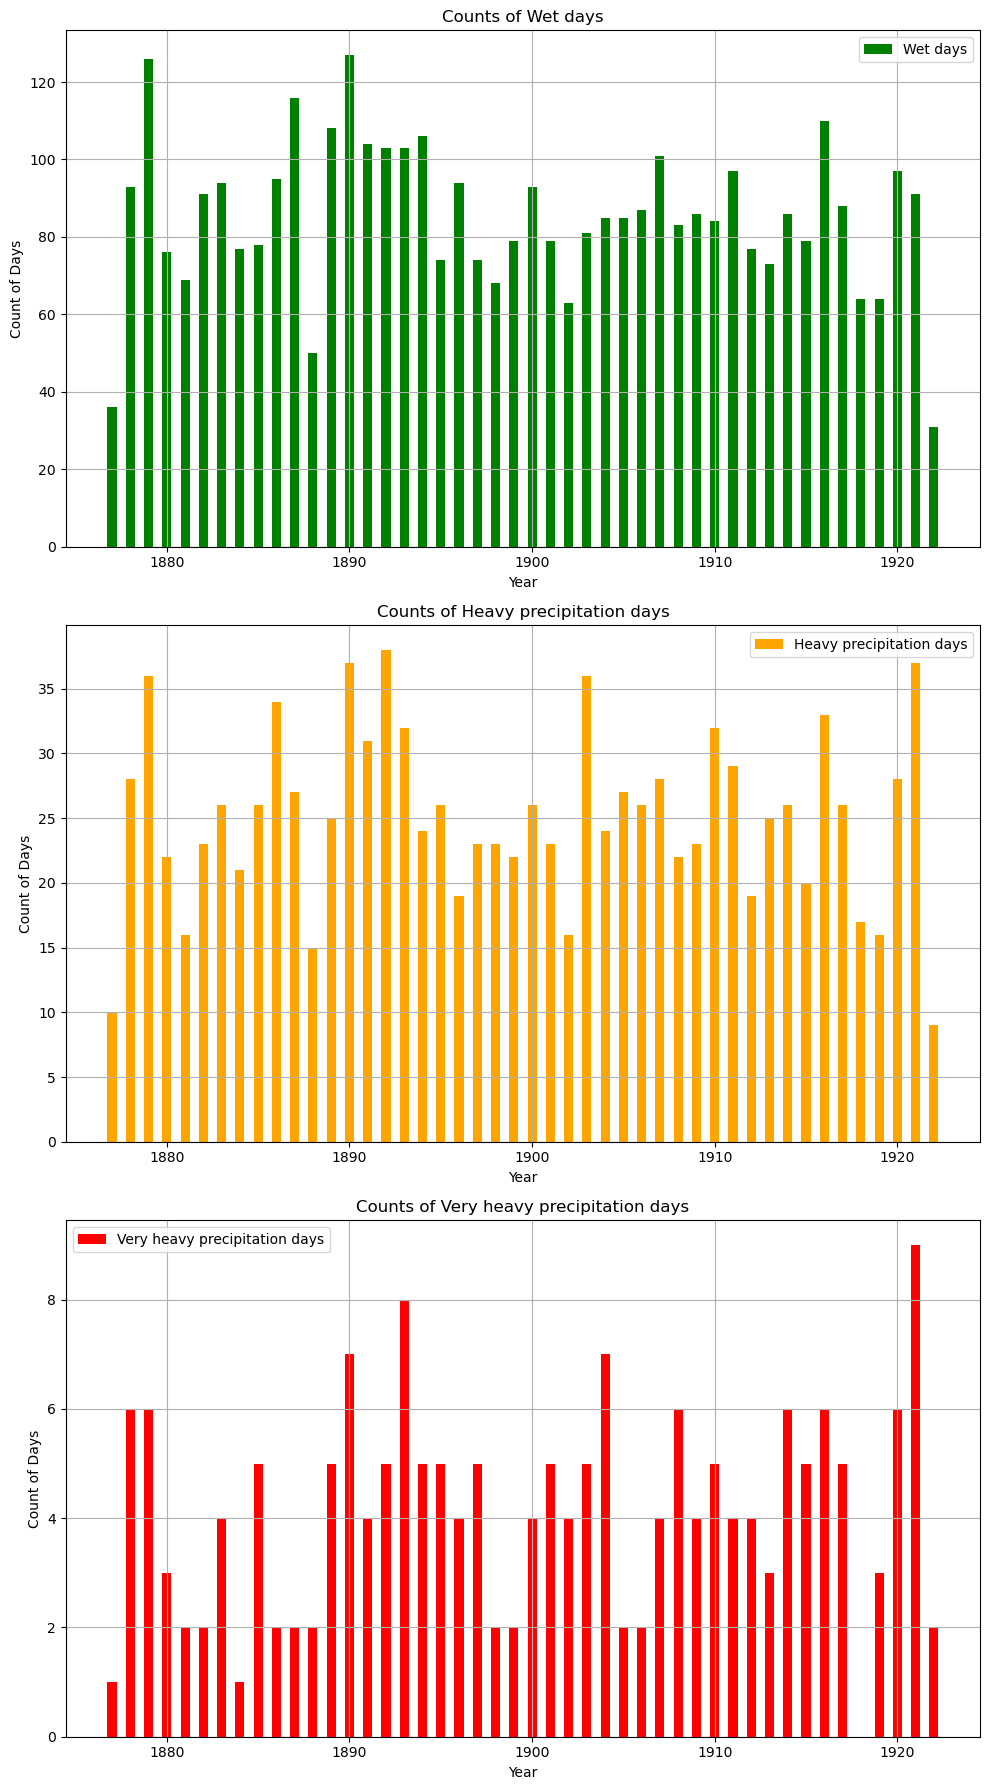

In [8]:
import matplotlib.pyplot as plt

# Plot the simplified bar graph
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Get years
years = filtered_df2['Year']

# Plot each index as a bar
bar_width = 0.5
index_colors = ['green', 'orange', 'red']

for ax, (index, color) in zip(axs, zip(index_counts.keys(), index_colors)):
    ax.bar(years, index_counts[index], width=bar_width, label=index, color=color)
    ax.set_title(f'Counts of {index}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count of Days')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

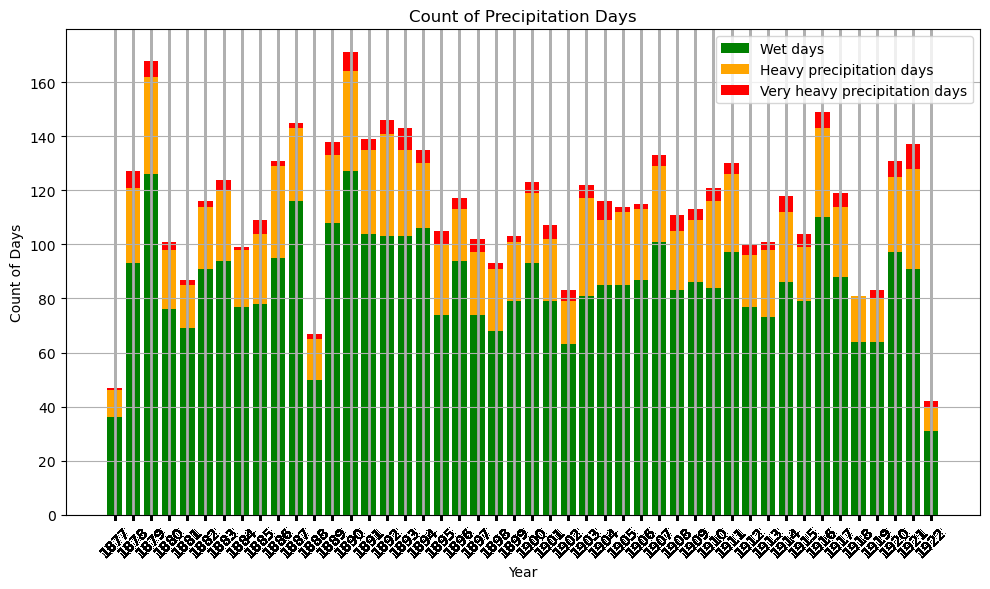

In [9]:
# Plot the stacked bar graph
plt.figure(figsize=(10, 6))

# Get years
years = filtered_df2['Year']

# Plot each index as a stacked bar
bottom = None
colors = ['green', 'orange', 'red']

for index, color in zip(index_counts.keys(), colors):
    plt.bar(years, index_counts[index], bottom=bottom, label=index, color=color)
    if bottom is None:
        bottom = index_counts[index]
    else:
        bottom = [sum(x) for x in zip(bottom, index_counts[index])]

# Add labels and legend
plt.title('Count of Precipitation Days')
plt.xlabel('Year')
plt.ylabel('Count of Days')
plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

# Load the saved data
filtered_df2 = pd.read_csv('Rainfall values without -99.9 values.csv')

# Define the criteria for each index
indices_criteria = {
    'Wet days': 1,
    'Heavy precipitation days': 10,
    'Very heavy precipitation days': 30
}

# Filter out years 1877 and 1922
filtered_df2 = filtered_df2[~filtered_df2['Year'].isin([1877, 1922])]

# Initialize a dictionary to store counts for each index
index_counts = {index: [] for index in indices_criteria}

# Calculate counts for each index for each year
for year in filtered_df2['Year']:
    year_data = filtered_df2[filtered_df2['Year'] == year]
    for index, criterion in indices_criteria.items():
        count = (year_data['Rainfall..mm.'] >= criterion).sum()
        index_counts[index].append(count)

# Calculate average number of days for each index
average_days = {index: sum(counts) / len(counts) for index, counts in index_counts.items()}

# Print average number of days for each index
for index, avg_days in average_days.items():
    print(f"Average number of days for {index}: {avg_days:.2f}")


Average number of days for Wet days: 87.68
Average number of days for Heavy precipitation days: 25.74
Average number of days for Very heavy precipitation days: 4.22
